In [20]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('mymoviedb.csv')

In [22]:
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [23]:
df['Genre'].head(5)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [24]:
df.duplicated().sum()

0

In [25]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [17]:
# SUMMARY
# we have dataset of 9827 rows and 9 columns
# no NAN or duplicates
# Date is object type we have to convert it to Date time
# Drop the unwanted columns - overview, org-lang and posterurl
# No outliers
#

# PRE-PROCESSING THE DATA

In [26]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])


C:\Users\lenovo\AppData\Local\Temp\ipykernel_12336\2308412910.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Release_Date'] = pd.to_datetime(df['Release_Date'])


ValueError: time data " - Just Desserts" doesn't match format "%d-%m-%Y", at position 1106. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [ ]:
df['Release_Date'] = df['Release_Date'].dt.year

In [28]:
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


# DROPPING THE COLUMNS

In [29]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [30]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [31]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,01-03-2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,25-02-2022,No Exit,2618.087,122,6.3,Thriller
3,24-11-2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,22-12-2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


In [36]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
print(df.dtypes)

Release_Date     object
Title            object
Popularity      float64
Vote_Count       object
Vote_Average    float64
Genre            object
dtype: object


# categorizing 'Vote_Average' columns
# here the values are cut and replaced with the string like popular, avg, below avg and not popular to describe it more using catigorize_col() above

In [37]:
def categorize_col(df, col, labels):
    # Get edges safely
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]
 # Drop duplicates in case quartiles are equal
    edges = sorted(list(set(edges)))

    df[col + '_cat'] = pd.cut(
        df[col],
        edges,
        labels=labels[:len(edges)-1],
        duplicates='drop',
        include_lowest=True
    )
    return df

In [38]:
# Call the function
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_col(df, 'Vote_Average', labels)

print(df)

     Release_Date                                 Title  Popularity  \
0      15-12-2021               Spider-Man: No Way Home    5083.954   
1      01-03-2022                            The Batman    3827.658   
2      25-02-2022                               No Exit    2618.087   
3      24-11-2021                               Encanto    2402.201   
4      22-12-2021                        The King's Man    1895.511   
...           ...                                   ...         ...   
9832   15-10-1973                              Badlands      13.357   
9833   01-10-2020                      Violent Delights      13.356   
9834   06-05-2016                          The Offering      13.355   
9835   31-03-2021  The United States vs. Billie Holiday      13.354   
9836   23-09-1984                               Threads      13.354   

     Vote_Count  Vote_Average                               Genre  \
0          8940           8.3  Action, Adventure, Science Fiction   
1        

In [39]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_cat
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,01-03-2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,25-02-2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,24-11-2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,22-12-2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [40]:
df.drop('Vote_Average', axis=1, inplace=True)


In [41]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_cat
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,"Action, Adventure, Science Fiction",popular
1,01-03-2022,The Batman,3827.658,1151,"Crime, Mystery, Thriller",popular
2,25-02-2022,No Exit,2618.087,122,Thriller,below_avg
3,24-11-2021,Encanto,2402.201,5076,"Animation, Comedy, Family, Fantasy",popular
4,22-12-2021,The King's Man,1895.511,1793,"Action, Adventure, Thriller, War",average


In [43]:
#check the counts of values for each category
df['Vote_Average_cat'].value_counts()  

Vote_Average_cat
not_popular    2567
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [44]:
# drop the NaN values
df.dropna(inplace = True)
df.isna().sum()

Release_Date        0
Title               0
Popularity          0
Vote_Count          0
Genre               0
Vote_Average_cat    0
dtype: int64

# We'd split geners into a list and then explode and dataframe to have only one gener per row for each movie

In [46]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_cat
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Action,popular
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Adventure,popular
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular
3,01-03-2022,The Batman,3827.658,1151,Crime,popular
4,01-03-2022,The Batman,3827.658,1151,Mystery,popular


In [47]:
df['Genre'] =df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [48]:
# now the no. of rows will be increased
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Release_Date      25792 non-null  object  
 1   Title             25792 non-null  object  
 2   Popularity        25792 non-null  float64 
 3   Vote_Count        25792 non-null  object  
 4   Genre             25792 non-null  category
 5   Vote_Average_cat  25792 non-null  category
dtypes: category(2), float64(1), object(3)
memory usage: 857.4+ KB


# DATA VISUALIZATION

In [49]:
# set the style for visualization
sns.set_style('whitegrid')

# What is the most frequent genre of movies on Netflix 

In [50]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

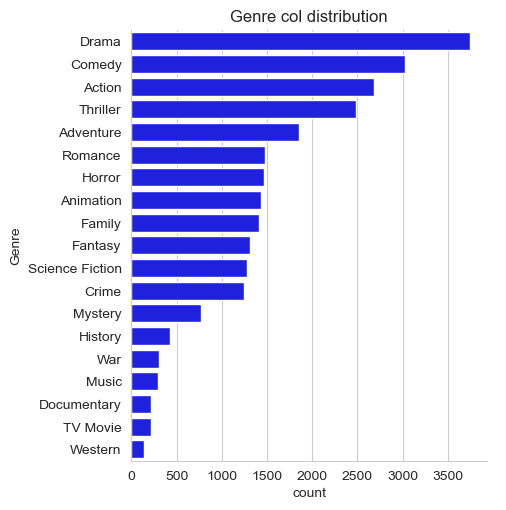

In [52]:
sns.catplot(y = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index,
            color = 'blue')
plt.title('Genre col distribution')
plt.show()

# Which has hightest votes in Vote_avg col

In [53]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_cat
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Action,popular
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Adventure,popular
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular
3,01-03-2022,The Batman,3827.658,1151,Crime,popular
4,01-03-2022,The Batman,3827.658,1151,Mystery,popular


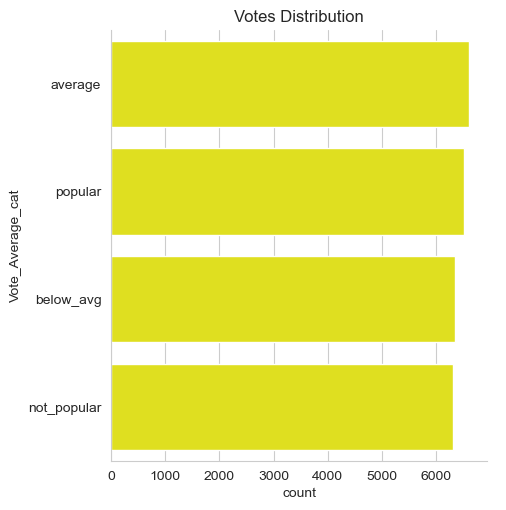

In [55]:
sns.catplot(y = 'Vote_Average_cat', data = df, kind = 'count', 
            order = df['Vote_Average_cat'].value_counts().index,
            color = 'yellow')
plt.title('Votes Distribution')
plt.show()

# Which movie got the hightest & lowest popularity & its genre

In [56]:
df.head(3)

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_cat
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Action,popular
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Adventure,popular
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular


In [58]:
df[df[('Popularity')] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_cat
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Action,popular
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Adventure,popular
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular


In [61]:
df[df['Popularity'] == df['Popularity']. min()]

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_cat
25786,31-03-2021,The United States vs. Billie Holiday,13.354,152,Music,average
25787,31-03-2021,The United States vs. Billie Holiday,13.354,152,Drama,average
25788,31-03-2021,The United States vs. Billie Holiday,13.354,152,History,average
25789,23-09-1984,Threads,13.354,186,War,popular
25790,23-09-1984,Threads,13.354,186,Drama,popular
25791,23-09-1984,Threads,13.354,186,Science Fiction,popular


# Which year has the most flimmed movie

In [68]:
# Change Date into Year

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [69]:
df['Release_Year'] = df['Release_Date'].dt.year
print (df)

      Release_Date                                 Title  Popularity  \
0       2021-12-15               Spider-Man: No Way Home    5083.954   
1       2021-12-15               Spider-Man: No Way Home    5083.954   
2       2021-12-15               Spider-Man: No Way Home    5083.954   
3       2022-03-01                            The Batman    3827.658   
4       2022-03-01                            The Batman    3827.658   
...            ...                                   ...         ...   
25787   2021-03-31  The United States vs. Billie Holiday      13.354   
25788   2021-03-31  The United States vs. Billie Holiday      13.354   
25789   1984-09-23                               Threads      13.354   
25790   1984-09-23                               Threads      13.354   
25791   1984-09-23                               Threads      13.354   

      Vote_Count            Genre Vote_Average_cat  Release_Year  
0           8940           Action          popular          2021  
1

In [70]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_cat,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Action,popular,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Adventure,popular,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular,2021
3,2022-03-01,The Batman,3827.658,1151,Crime,popular,2022
4,2022-03-01,The Batman,3827.658,1151,Mystery,popular,2022


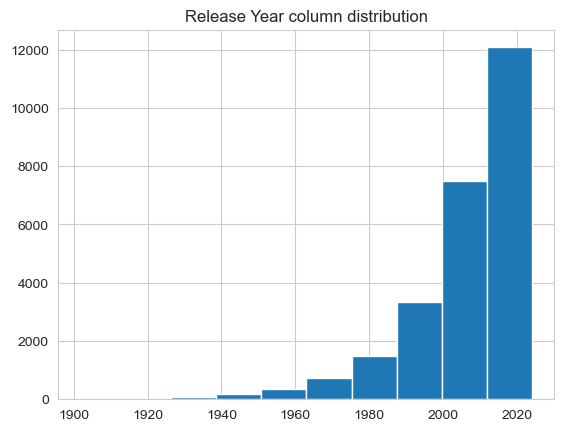

In [71]:
df['Release_Year'].hist()
plt.title('Release Year column distribution')
plt.show()